## Who eats the food we grow?

"Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.
This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals."

(kaggle)

In [40]:
# import required packages

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.style.use("ggplot")

# The dataset:
The Food and Agriculture Organization of the United Nations provides free access to food and 
agriculture data for countries and territories, from the year 1961 to the most recent
update (depends on the dataset), in this case 2013. 

In [2]:
prod = pd.read_csv("FAO.csv", sep=",", encoding='latin-1')

In [3]:
prod.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
# rename columns

prod.rename({'Area Code': 'Area_Code', 'Area Abbreviation': 'Area_abbrev', 'Item Code': 'Item_Code', 
'Element Code': 'Element_Code'}, axis=1, inplace=True)

In [5]:
prod.head()

,Area_abbrev,Area_Code,Area,Item_Code,Item,Element_Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


# Learning about the dataset

In [6]:
# check number of rows and columns of the data
prod.shape

(21477, 63)

In [7]:
# drop any duplicate records from the dataset
prod.drop_duplicates(inplace = True)

In [8]:
prod.shape
# are no duplicates

(21477, 63)

# Checking null values and data types
There are null values in the data - for now have left them as is as just wanting to see trends in data.
Would fill in for ML - e.g. with median values

In [9]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area_abbrev   21477 non-null  object 
 1   Area_Code     21477 non-null  int64  
 2   Area          21477 non-null  object 
 3   Item_Code     21477 non-null  int64  
 4   Item          21477 non-null  object 
 5   Element_Code  21477 non-null  int64  
 6   Element       21477 non-null  object 
 7   Unit          21477 non-null  object 
 8   latitude      21477 non-null  float64
 9   longitude     21477 non-null  float64
 10  Y1961         17938 non-null  float64
 11  Y1962         17938 non-null  float64
 12  Y1963         17938 non-null  float64
 13  Y1964         17938 non-null  float64
 14  Y1965         17938 non-null  float64
 15  Y1966         17938 non-null  float64
 16  Y1967         17938 non-null  float64
 17  Y1968         17938 non-null  float64
 18  Y1969         17938 non-nu

In [10]:
# How many countries/regions are included in the dataset?
len(prod['Area'].unique())

174

In [11]:
# Which countries/regions are included in the dataset?
prod['Area'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'G

In [12]:
# What food and/or feed items are in the dataset?
prod['Item'].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [13]:
# How many food/feed items in dataset?
len(prod['Item'].unique())

115

In [14]:
# area codes are 1-276
prod['Area_Code'].describe()

count    21477.000000
mean       125.449411
std         72.868149
min          1.000000
25%         63.000000
50%        120.000000
75%        188.000000
max        276.000000
Name: Area_Code, dtype: float64

In [15]:
# item codes are 2511-2961
prod['Item_Code'].describe()

count    21477.000000
mean      2694.211529
std        148.973406
min       2511.000000
25%       2561.000000
50%       2640.000000
75%       2782.000000
max       2961.000000
Name: Item_Code, dtype: float64

In [16]:
# we have data on food (consumed by humans) and feed (consumed by animals)
prod['Element'].unique()

array(['Food', 'Feed'], dtype=object)

# correlation matrix

Years that are closer together in time are more highly correlated with each other than years that are further apart


In [59]:
prod.iloc[: , 10:].corr(numeric_only = True).corr(numeric_only = True)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Y1961,1.000000,0.999139,0.995527,0.989246,0.990650,0.989192,0.987397,0.989136,0.989511,0.982424,...,-0.918250,-0.925782,-0.935553,-0.938260,-0.943636,-0.946632,-0.951238,-0.953565,-0.956280,-0.955354
Y1962,0.999139,1.000000,0.998531,0.994303,0.995319,0.994266,0.992942,0.994234,0.994432,0.989039,...,-0.916370,-0.924480,-0.934605,-0.937756,-0.943360,-0.946530,-0.951248,-0.953392,-0.956328,-0.955443
Y1963,0.995527,0.998531,1.000000,0.998595,0.998901,0.998178,0.997511,0.998307,0.998198,0.994876,...,-0.909482,-0.918413,-0.929049,-0.932788,-0.938784,-0.942226,-0.947185,-0.949126,-0.952393,-0.951518
Y1964,0.989246,0.994303,0.998595,1.000000,0.999556,0.999038,0.999073,0.999398,0.999007,0.997619,...,-0.897267,-0.907097,-0.918399,-0.922751,-0.929230,-0.932998,-0.938288,-0.940094,-0.943748,-0.942859
Y1965,0.990650,0.995319,0.998901,0.999556,1.000000,0.999763,0.999634,0.999882,0.999811,0.998369,...,-0.904275,-0.913815,-0.924970,-0.929156,-0.935374,-0.938999,-0.944070,-0.945783,-0.949247,-0.948350
Y1966,0.989192,0.994266,0.998178,0.999038,0.999763,1.000000,0.999891,0.999911,0.999899,0.999109,...,-0.907898,-0.917348,-0.928327,-0.932533,-0.938522,-0.942062,-0.946929,-0.948447,-0.951815,-0.950972
Y1967,0.987397,0.992942,0.997511,0.999073,0.999634,0.999891,1.000000,0.999900,0.999851,0.999505,...,-0.903002,-0.912747,-0.924023,-0.928406,-0.934567,-0.938228,-0.943236,-0.944745,-0.948245,-0.947376
Y1968,0.989136,0.994234,0.998307,0.999398,0.999882,0.999911,0.999900,1.000000,0.999931,0.999024,...,-0.903921,-0.913556,-0.924751,-0.929027,-0.935203,-0.938844,-0.943880,-0.945485,-0.948966,-0.948081
Y1969,0.989511,0.994432,0.998198,0.999007,0.999811,0.999899,0.999851,0.999931,1.000000,0.999025,...,-0.905251,-0.914821,-0.926036,-0.930263,-0.936382,-0.939996,-0.944992,-0.946589,-0.950026,-0.949127
Y1970,0.982424,0.989039,0.994876,0.997619,0.998369,0.999109,0.999505,0.999024,0.999025,1.000000,...,-0.901203,-0.911177,-0.922558,-0.927160,-0.933297,-0.936990,-0.941928,-0.943218,-0.946761,-0.945922


<AxesSubplot:>

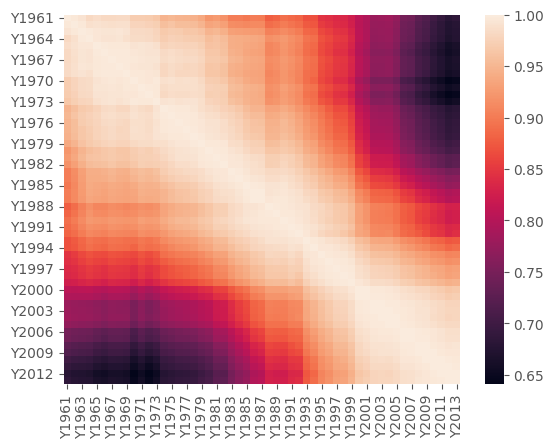

In [60]:
sns.heatmap(prod.iloc[: , 10:].corr(numeric_only = True))

# Histogram of the count of the different areas in the data
some countries have less data than others - from graphs you can see some
countries had no records until quite recent years
possibly as they didn't record feed and food information until then, country didn't exist 
before then or they had records but these were not being uploaded to the UN.

Text(0, 0.5, 'Count of area code')

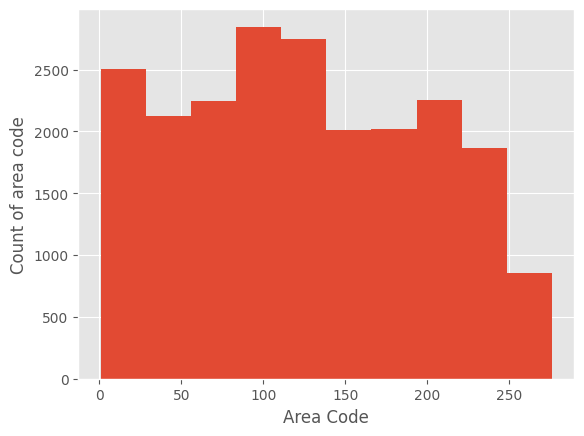

In [18]:
# plot histogram

plt.hist(prod['Area_Code'])
plt.xlabel('Area Code')
plt.ylabel('Count of area code')

# Histogram of the count of the different items in the data

Text(0, 0.5, 'Count of item code')

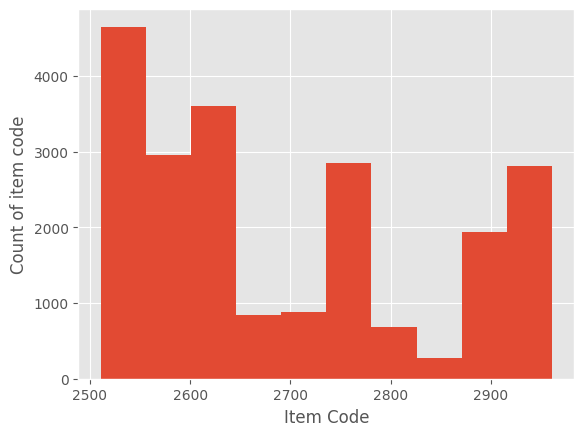

In [19]:
# plot histogram
plt.hist(prod['Item_Code'])
plt.xlabel('Item Code')
plt.ylabel('Count of item code')

In [20]:
# Null values - not doing machine learning so just leaving as is at this stage
prod.head()

,Area_abbrev,Area_Code,Area,Item_Code,Item,Element_Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [58]:
prod.groupby(['Item']).sum(numeric_only = True)

/tmp/ipykernel_59118/4147640811.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod.groupby(['Item']).sum()


,Area_Code,Item_Code,Element_Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,21600,505852,889566,3353.57,2688.46,69924.0,72447.0,75105.0,77976.0,80127.0,...,217392.0,222722.0,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701
Animal fats,35415,824880,1479934,5498.68,4265.88,10359.0,10929.0,11116.0,11361.0,11469.0,...,22781.0,22641.0,23314.0,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186
Apples and products,24926,507698,1005128,4278.87,3432.17,10833.0,13110.0,14034.0,14509.0,13692.0,...,53749.0,55468.0,57909.0,59699.0,60956.0,61415.0,62436.0,64886.0,68851,71334
"Aquatic Animals, Others",16142,373815,694170,2908.58,2642.51,39.0,39.0,41.0,45.0,49.0,...,820.0,936.0,1012.0,979.0,1277.0,1322.0,1340.0,1382.0,1240,1249
Aquatic Plants,20313,455100,844046,3304.29,2825.49,502.0,581.0,577.0,619.0,699.0,...,10726.0,10853.0,11031.0,11352.0,11710.0,12130.0,12767.0,13367.0,14508,14619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vegetables,32582,752844,1358472,6093.31,4494.38,179658.0,178938.0,179717.0,177356.0,182315.0,...,791599.0,812355.0,843601.0,869257.0,898452.0,921715.0,950541.0,981219.0,1013621,1034682
"Vegetables, Other",32582,672090,1358472,6093.31,4494.38,147094.0,144595.0,146385.0,142942.0,146929.0,...,622915.0,640267.0,666819.0,682087.0,707525.0,717882.0,745438.0,766225.0,794960,811496
Wheat and products,34809,685503,1441287,6361.88,5195.27,138829.0,144643.0,147325.0,156273.0,168822.0,...,527394.0,532263.0,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492


# Food vs feed

Element       Feed       Food
Y1961     884314.0  2618297.0
Y1962     913198.0  2688434.0
Y1963     954852.0  2730772.0
Y1964     972294.0  2793351.0
Y1965    1006792.0  2895741.0


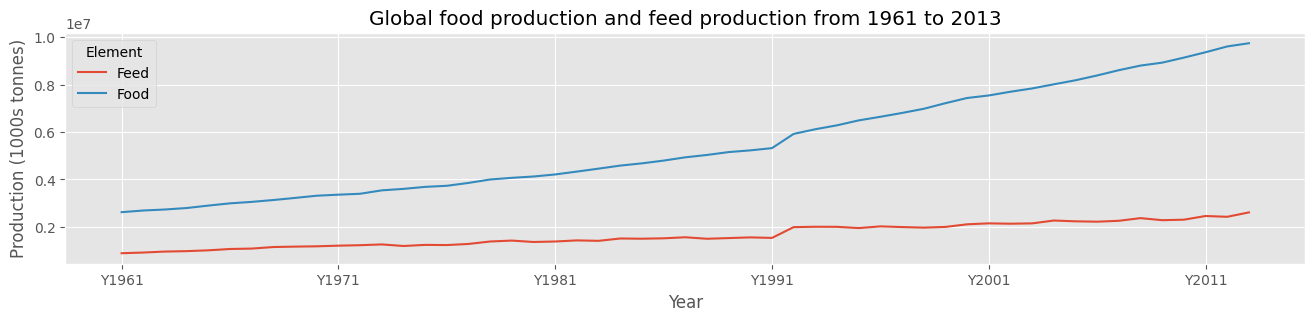

In [22]:
# Food vs feed

food_feed = prod.groupby(['Element']).sum(numeric_only = True)

food_feed.drop(['Area_Code', 'Item_Code', 'Element_Code', 'latitude', 'longitude'],\
     inplace=True, axis=1)

food_feed_T = food_feed.transpose()

print(food_feed_T.head())

# graph food vs feed globally
global_plot = food_feed_T.plot(kind = 'line', figsize=(16, 3), title='Global food production and feed production from\
 1961 to 2013', xlabel='Year', ylabel="Production (1000s tonnes)")

plt.show()

global_plot1 = global_plot.figure

global_plot1.savefig(f'global_trends_food_feed_production.png')
plt.close(global_plot1)

# By country - food and feed
def function to plot production of food and feed for each country

-  nb: running this function will create a folder in your working directory called graphs and output a graph for each country

In [23]:
def country_food_feed (data=prod, country = 'Afganistan', group='Element'):

    my_dat = data.loc[data['Area'] == country]

    a_food_feed = my_dat.groupby([group]).sum(numeric_only= True)

    a_food_feed.drop(['Area_Code', 'Item_Code', 'Element_Code', 'latitude', 'longitude'],\
    inplace=True, axis=1)

    a_food_feed_T = a_food_feed.transpose()

    a_food_feed_T.head()

    fig = a_food_feed_T.plot(kind = 'line', figsize=(16, 3), title=f'Local food production and feed production from\
1961 to 2013 for {country}', xlabel='Year', ylabel="Production (1000s tonnes)")

    fig1 = fig.figure

    # create graphs folder in working directory
    if not os.path.exists("graphs"):
        os.makedirs("graphs")

    # output graphs
    fig1.savefig(f'graphs/food_feed_{country}.png')
    plt.close(fig1)

    # references = 1,2,3

In [24]:
# print feed and food production for all countries

countries = prod['Area'].unique()

for cntry in countries:
    country_food_feed(country = cntry)

# Plot percentage of dataset that describes food and percentage that describes feed

In [25]:
# make feed df
feed = prod.loc[prod['Element'] == 'Feed']

feed.shape

(3949, 63)

In [26]:
# make food df
food = prod.loc[prod['Element'] == 'Food']

food.shape

(17528, 63)

In [27]:
food_pc = (food.shape[0] / (food.shape[0] + feed.shape[0])) * 100

print(f'Our food data makes up {food_pc} percent of this dataset')

feed_pc = (feed.shape[0] / (food.shape[0] + feed.shape[0])) * 100
print(f'Our feed data makes up {feed_pc} percent of this dataset')

Our food data makes up 81.6128882059878 percent of this dataset
Our feed data makes up 18.3871117940122 percent of this dataset


Text(0, 0.5, 'Percentage')

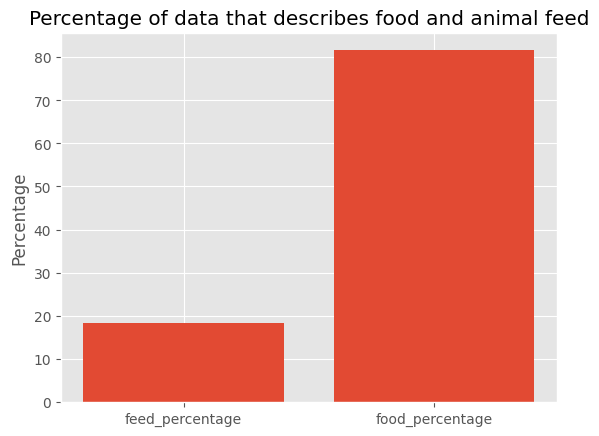

In [28]:
df = pd.DataFrame({'name': ['feed_percentage', 'food_percentage'], 'percentage': [feed_pc, food_pc]}, index=[0,1])
df

bar_plt = plt.bar(df['name'], df['percentage'])
plt.title('Percentage of data that describes food and animal feed')
plt.ylabel('Percentage')


In [29]:
feed.head()

,Area_abbrev,Area_Code,Area,Item_Code,Item,Element_Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81
10,AFG,2,Afghanistan,2537,Sugar beet,5521,Feed,1000 tonnes,33.94,67.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
14,AFG,2,Afghanistan,2549,"Pulses, Other and products",5521,Feed,1000 tonnes,33.94,67.71,...,3.0,2.0,3.0,3.0,3.0,5.0,4.0,5.0,4,4


# Feed and food correlation matrices
Correlation is lower between years as more time passes between them. This drop in correlation is bigger for feed then food

In [53]:
food.iloc[: , 10:].corr(numeric_only = True)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Y1961,1.000000,0.998104,0.991160,0.977996,0.982242,0.979213,0.978798,0.980146,0.981055,0.966843,...,0.795272,0.788278,0.769687,0.762313,0.755284,0.748848,0.742027,0.737387,0.729820,0.726376
Y1962,0.998104,1.000000,0.995736,0.985685,0.989489,0.987405,0.987697,0.988413,0.988797,0.977848,...,0.784572,0.777065,0.758186,0.750187,0.742569,0.735651,0.728527,0.723782,0.715417,0.711894
Y1963,0.991160,0.995736,1.000000,0.996328,0.995976,0.992352,0.992841,0.993993,0.991845,0.983738,...,0.780444,0.772585,0.754747,0.746187,0.737459,0.730527,0.722903,0.718223,0.709243,0.705533
Y1964,0.977996,0.985685,0.996328,1.000000,0.994310,0.989142,0.990699,0.991994,0.987886,0.982449,...,0.773695,0.765446,0.748803,0.740045,0.730358,0.723280,0.715298,0.710480,0.700774,0.697034
Y1965,0.982242,0.989489,0.995976,0.994310,1.000000,0.998292,0.997386,0.997666,0.996111,0.992544,...,0.766122,0.757553,0.738139,0.728582,0.719612,0.712079,0.704156,0.699608,0.690129,0.686298
Y1966,0.979213,0.987405,0.992352,0.989142,0.998292,1.000000,0.998895,0.998079,0.998023,0.996222,...,0.752620,0.743822,0.723140,0.713199,0.704525,0.696649,0.688714,0.684208,0.674538,0.670689
Y1967,0.978798,0.987697,0.992841,0.990699,0.997386,0.998895,1.000000,0.999184,0.998897,0.996867,...,0.757528,0.748785,0.728642,0.718822,0.710045,0.702088,0.694237,0.689562,0.679619,0.675829
Y1968,0.980146,0.988413,0.993993,0.991994,0.997666,0.998079,0.999184,1.000000,0.998793,0.995812,...,0.765975,0.757388,0.737917,0.728326,0.719485,0.711790,0.703975,0.699368,0.689566,0.685789
Y1969,0.981055,0.988797,0.991845,0.987886,0.996111,0.998023,0.998897,0.998793,1.000000,0.997130,...,0.762076,0.753460,0.733231,0.723672,0.715309,0.707398,0.699698,0.695130,0.685396,0.681688
Y1970,0.966843,0.977848,0.983738,0.982449,0.992544,0.996222,0.996867,0.995812,0.997130,1.000000,...,0.728768,0.719416,0.697990,0.687758,0.678765,0.670300,0.662327,0.657820,0.647258,0.643439


<AxesSubplot:>

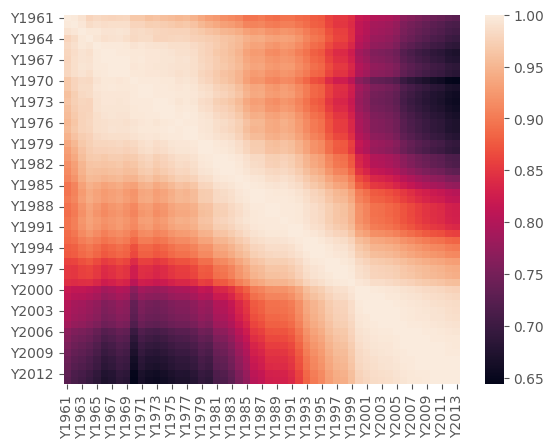

In [54]:
sns.heatmap(food.iloc[: , 10:].corr(numeric_only = True))

In [55]:
feed.iloc[: , 10:].corr(numeric_only = True)


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Y1961,1.000000,0.995409,0.993016,0.990603,0.993191,0.988810,0.987460,0.988549,0.989065,0.979352,...,0.833507,0.825115,0.807289,0.811351,0.772422,0.759126,0.717812,0.671967,0.642895,0.662920
Y1962,0.995409,1.000000,0.996625,0.994147,0.994953,0.991792,0.988380,0.990720,0.990345,0.979678,...,0.838130,0.829729,0.811565,0.814529,0.775740,0.764019,0.722825,0.676724,0.647502,0.666905
Y1963,0.993016,0.996625,1.000000,0.998787,0.995196,0.996512,0.993420,0.995739,0.992376,0.985342,...,0.845482,0.836612,0.820406,0.823632,0.788915,0.777640,0.739568,0.697067,0.669734,0.687401
Y1964,0.990603,0.994147,0.998787,1.000000,0.995656,0.997627,0.995979,0.996782,0.993368,0.988964,...,0.854044,0.845094,0.829096,0.831861,0.798235,0.788237,0.751561,0.710662,0.684243,0.701200
Y1965,0.993191,0.994953,0.995196,0.995656,1.000000,0.996816,0.996482,0.995064,0.996977,0.992352,...,0.867295,0.858702,0.840661,0.843369,0.807953,0.796922,0.758308,0.715075,0.687861,0.705869
Y1966,0.988810,0.991792,0.996512,0.997627,0.996816,1.000000,0.998095,0.998549,0.996936,0.993987,...,0.875134,0.866595,0.850821,0.853627,0.821382,0.811883,0.776358,0.736719,0.711356,0.728261
Y1967,0.987460,0.988380,0.993420,0.995979,0.996482,0.998095,1.000000,0.996950,0.996499,0.995816,...,0.884733,0.876345,0.860253,0.863187,0.830426,0.821269,0.786223,0.746719,0.721061,0.738136
Y1968,0.988549,0.990720,0.995739,0.996782,0.995064,0.998549,0.996950,1.000000,0.997422,0.994061,...,0.871083,0.861996,0.846038,0.849017,0.815790,0.806105,0.769573,0.729030,0.702669,0.719497
Y1969,0.989065,0.990345,0.992376,0.993368,0.996977,0.996936,0.996499,0.997422,1.000000,0.996336,...,0.880054,0.871139,0.853527,0.856365,0.821479,0.811165,0.772903,0.730628,0.703384,0.720906
Y1970,0.979352,0.979678,0.985342,0.988964,0.992352,0.993987,0.995816,0.994061,0.996336,1.000000,...,0.895014,0.885684,0.868124,0.870660,0.838761,0.830204,0.794950,0.755920,0.730823,0.746544


<AxesSubplot:>

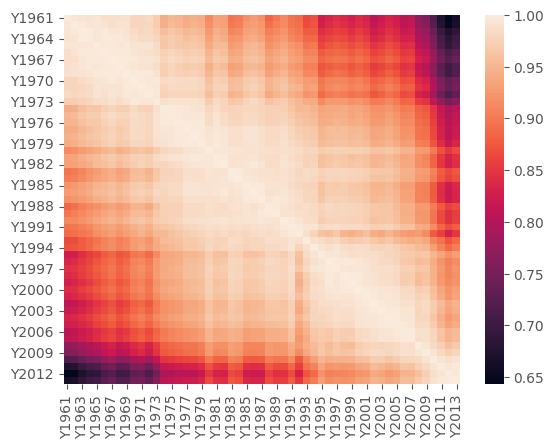

In [56]:
sns.heatmap(feed.iloc[: , 10:].corr(numeric_only = True))

# Function to find top and bottom 10 countries for food and feed production

In [30]:
# Create dataframe with 1 row each country of total tonnes per country of food/feed

def highest_lowest_producers(which_production_type = food, year = "Y1971"):
    f_max = which_production_type.loc[:, ["Area", year]]
    f_max = f_max.groupby(by = "Area", dropna = True, as_index=False).sum()

    df = f_max.sort_values(by = year, ascending = False)

    # Top 10 producing countries
    top_10 = df.iloc[0:10]
    
    # Bottom 10 producing countries
    df1 = f_max.sort_values(by = year, ascending = True)
    df1 = df1[df1[year] > 0]
    bottom_10 = df1.iloc[0:10]
    
    # Write results to text file
    top_10.to_csv(r'top_10.txt', index=True, sep=",")
    bottom_10.to_csv(r'bottom_10.txt', index=True, sep=",")

    return top_10, bottom_10

# reference #4 and #5

In [31]:
# define function that plots the top 10 producers of either food or feed for any year
# if multi_col = True it will plot each bar in different colour, otherwise bars will be red

def countries_production(yr = 1961, yr1 = 'Y1961', dt = food, nme_dt = 'food', multi_col = True):
   dat_top, dat_bottom = highest_lowest_producers(which_production_type = dt, year = yr1)

   if multi_col == True:
      my_colors = ['royalblue', 'salmon', 'springgreen', 'darkorange', 'darkviolet',\
   'darkgrey', 'aqua', 'hotpink', 'gold', 'slateblue']
   else:
      my_colors = 'red'

   bar_1961 = plt.bar(dat_top['Area'],dat_top[yr1], color = my_colors)
   plt.title(f'Top 10 producers of {nme_dt} in {yr}')
   plt.ylabel('Total annual production (1000 tonnes)')
   plt.xlabel('Area')
   plt.xticks(rotation = 75)
   plt.show()


# reference #6, #7, #8


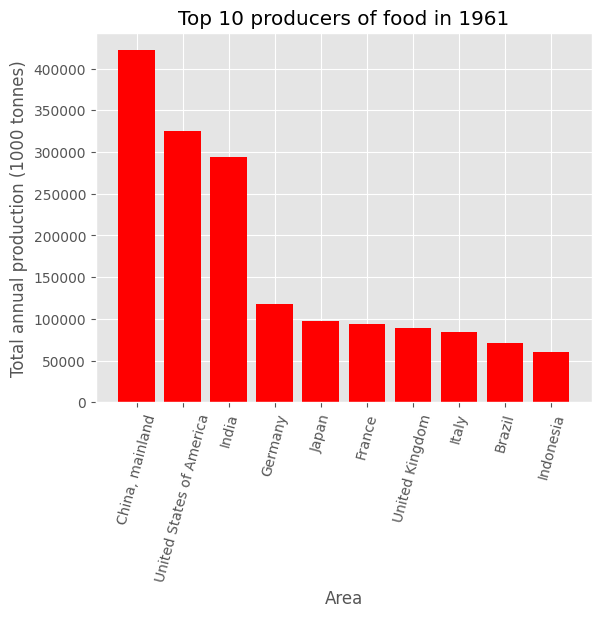

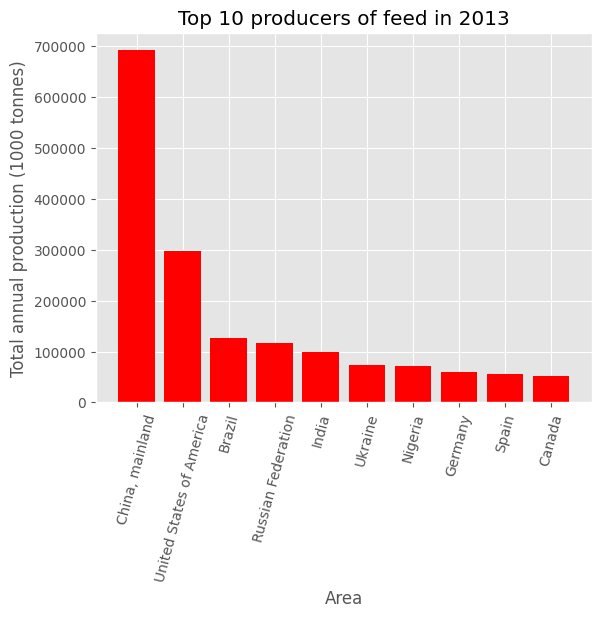

In [62]:
# run function and plot countries production
# 1961 and 2013
# (nb - keep all bars same colour for presentation - easier to follow when looking at same things)

countries_production(multi_col = False)

countries_production(dt = feed, nme_dt = 'feed', yr = 2013, yr1 = 'Y2013', multi_col = False)

# Subcategories of food and feed

In [33]:
# What do the top producers make the most of?
# define function that plots top 10 subcategories of food or feed for given country and year

def subcategories_search(year = 'Y1961', yr = 1961, country = 'China, mainland', data = food,\
     dat = 'food', plot_color = 'b'):
    sub_df = data.loc[:, ['Area', 'Item', year]]
    sub = sub_df.groupby(by = ['Area', 'Item'], dropna = True, as_index=False).sum()
    sub_1cntry = sub.loc[sub['Area'] == country]


    # top 10 types of food they produce
    df = sub_1cntry.sort_values(by = year, ascending = False)

    # Top 10 producing countries
    top_10_sub = df.iloc[0:10]

    # plot  the top 10 items
    _ = plt.bar(top_10_sub['Item'], top_10_sub[year], color = plot_color)
    plt.title(f'Top 10 subcategories of {dat} production in {country}, {yr}')
    plt.ylabel('Total annual production (1000 tonnes)')
    plt.xticks(rotation = 90)
    plt.show()


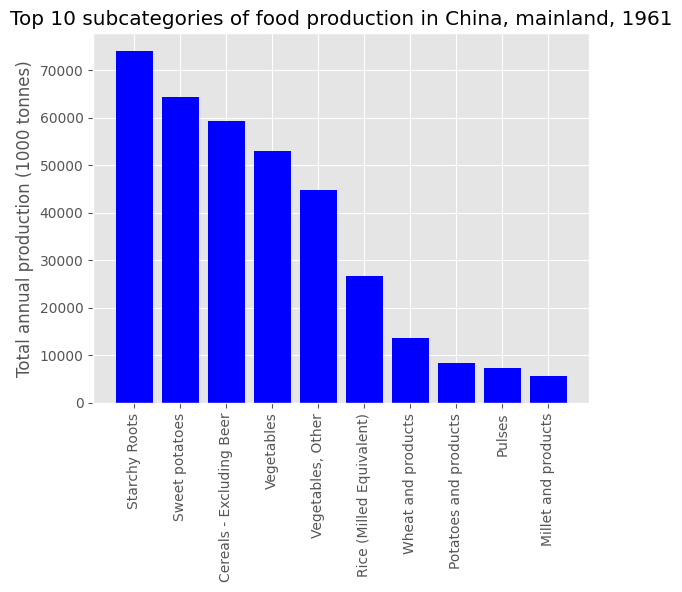

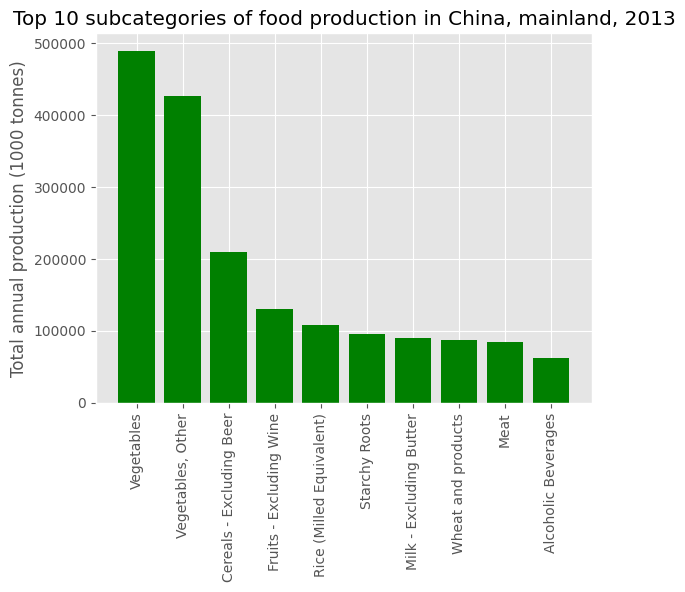

In [34]:
# run function

subcategories_search()

subcategories_search(year = 'Y2013', yr = 2013, plot_color = 'g')

Other factors that could impact on annual food/feed production
- local climate/rainfall that year
- socio economic factors in the country (war, unrest)
- local disasters
- global events like covid


# The data set
https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production

# Coding references:
 1) https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
 2) https://forum.freecodecamp.org/t/attribute-error-axessubplot-object-has-no-attribute-savefig/460255
 3) https://www.geeksforgeeks.org/how-to-create-directory-if-it-does-not-exist-using-python/
 4) https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/03_subset_data.html
 5) https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file
 6) https://www.pythoncharts.com/matplotlib/rotating-axis-labels/
 7) https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
 8) https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors

# References:
a) https://www.nationalgeographic.com/foodfeatures/feeding-9-billion

b) https://news.un.org/en/story/2019/10/1048452

c) https://news.cornell.edu/stories/1997/08/us-could-feed-800-million-people-grain-livestock-eat

d) https://ifif.org/global-feed/statistics/

e) https://www.mpi.govt.nz/dmsdocument/20897-feed-use-in-the-nz-dairy-industry

f) https://www.sciencedirect.com/science/article/pii/S175173111700324X

g) https://www.bloomberg.com/news/features/2020-12-15/no-more-hunger-how-to-feed-everyone-on-earth-with-just-the-land-we-have?leadSource=uverify%20wall

h) https://knowledgeburrow.com/what-was-collectivization-and-did-it-work-in-china/

i) https://www.journals.uchicago.edu/doi/abs/10.1086/261732

j) https://link.springer.com/article/10.1057/ces.2008.4

k) https://www.greenleft.org.au/content/hungarian-reforms-1980s

l) https://www.researchgate.net/publication/295597691_Changes_in_Hungary%27s_agriculture_in_the_1990s

m) https://www.canr.msu.edu/news/feed-saved-the-next-step-in-breeding-a-more-efficient-cow